<h1><center> Instituto Rosario Castellanos </center></h1>
<h1><center> Lic. Ciencia de Datos </center></h1>

<h1><center> Modelado y Simulación </center></h1>

<h1><center> Oswaldo Ivan Villa Pérez </center></h1>

<h3><center> Fecha: 20 - Dic - 2022 </center></h3>

# Introducción


En este ejemplo se desea mostrar la factibilidad de python al momento de crear data pipeline para el consumo de datos desde una API.

Actualmente las grandes empresas y fuentes de datos publicas han puesto a disposicion API's para consumo de sus datos. Una API es una abreviatura de Application Programming Interfaces, que en español significa interfaz de programación de aplicaciones. Este servicio web esta construido con protocolos y reglas para cada usuario, por lo que el acceso a la informacion esta controlado por los administradores, además generalmente es necesario crear un perfil de usario para crear el sus llaves de acceso a las bases de datos. 

Aprender a consumir datos de estos protocolos es de suma importancia ya que la industria se va actualizando y es probable que en el futuro pueda estandarizarce este tipo de servicios web para consumo masivo de datos, que ademas de ser una recurso eficiente puede ser consumido directamente con diferentes lenguajes de programación.

Para este trabajo he decidido consumir datos publicos de la API de Binance Exchange, que es el mayor exchange de criptomonedas en términos de volumen de trading, actualmente representan el principal ecosistema de cadenas de bloques del mundo y cuenta con una oferta de productos que incluye el mayor exchange de activos digitales.

Actualmente existe cantidades de dinero inimaginalbes invertidas en criptoactivos, ademas del gran volumen de fraudes que han sucedido en la historia por la desinformacion sobre estos nuevos activos finaciero.



# API - Binance

Para conectarce a la API de Binance es necesario crear una cuenta de usuario para acceder a las credenciales para cada flujo de datos que se desee extrar desde la platafoma.

Los pasos para crear un acceso a Binance son los siguientes.

 **¿Cómo crear una clave de API?**
 
1. Inicia sesión en tu cuenta de Binance y haz clic en [Gestión de API] en el icono del centro de usuarios.
2. Introduce una etiqueta o nombre para tu clave de API y haz clic en [Crear API].
3. Completa la verificación de seguridad con tus dispositivos registrados para la 2FA.


Una vez completado estos pasos procederemos a instalar la biblioteca _python-binance_, lo siguiente sera correr las librerias necesarias para su conexión al servidor de Binance y empezar a consumir los datos necesarios.

In [87]:
# Instalamos la API de Binance
!pip install python-binance -q

In [81]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import numpy as np
import os

In [2]:
#Colocamos nuestros accesos
api_key = 'VwmY6JXokutF4FSxjykU2NVr8GE4dfiSj7RT3FjEJoP9ToZUDzo4rpZZ2LtoDknd'
api_secret = 'wAG60osQSWhzPFKngSaY2EDFpWoIhr9p5cevqTtY2A1xG91F1AdHngs1xnMCYwcg'

In [3]:
#Conectamos nuestras llaves
client = Client(api_key, api_secret)

#Validación de accesos
print('Connected', client.ping())

Connected {}


# Listado de Monedas

Como primer ejercicio para validar el acceso a nuestro servicio, vamos a traer todas las monedas de Binance que estan listadas en el mercado en USD, para esto hacemos uso de algunas funciones de la libreria que hemos importado. El uso de todas las fucniones de la API estan descritas en la Documentación Oficial de binance.

Es importante señara el metodo funciones regex para segmentar los datos, ya que necesitabamos que nos regresara todas las mondedsa que terminaban con la palabra USD.


In [12]:
#Traemos todos los tickets
info = client.get_all_tickers()

In [5]:
#Guardamos los datos en un dataframe
df = pd.DataFrame(client.get_all_tickers())

df["price"]=df["price"].astype("float")
df["symbol"]=df["symbol"].astype("string")

In [6]:
#Indexamos los valores con regex
df = df[df.symbol.str.contains('USDT$', regex=True)]
df = df.sort_values(by=['price'], ascending=False)

In [9]:
#Mostramos el Total de Observaciones
df.shape

(418, 2)

In [11]:
df.head(5)

,symbol,price
11,BTCUSDT,16729.09
912,YFIUSDT,5691.00
968,PAXGUSDT,1804.00
701,BULLUSDT,1370.28
994,YFIIUSDT,1253.90


# Procesamos unas Monedas



Para este ejercico vamos a obter informacion historica de las monedas que en lo personal me parecen las mas significativas dentro del mundo de los criptoactivos.

Lista de Monedas

1. Bitcoin
2. Ethereum
3. Cardano
4. Doge
5. Binance

Hemos obtenido información historica de estas monedas desde el 1 january 2018 hasta dias recientes de enero, esta informacion fue procesada para serle asigandos los nombres correctos de las columnas, han sido guardadas en un DataFrame y fueron guardados los data set en una carpeta llamada descargas para almacenar los resultados finales en un formato .parquet


In [61]:
historical_data = client.get_historical_klines('DOGEUSDT', Client.KLINE_INTERVAL_1DAY, '1 january 2018')

In [62]:
hist_df = pd.DataFrame(historical_data)

In [63]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [64]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [65]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [66]:
hist_df['Close Time'] = hist_df['Close Time'].astype('datetime64[s]')
hist_df['Symbol'] = hist_df['Symbol'] = 'DOGE'

In [ ]:
os.mkdir('docs')

In [67]:
hist_df.to_parquet('./docs'+'Doge.parquet')

In [94]:
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore,Symbol
0,2019-07-05,0.004490,0.004600,0.003550,0.003870,1.928298e+09,2019-07-05 23:59:59,7.506289e+06,18589,858403324.0,3.336426e+06,0,DOGE
1,2019-07-06,0.003874,0.003943,0.003365,0.003500,1.010744e+09,2019-07-06 23:59:59,3.692804e+06,17250,522724122.0,1.908500e+06,0,DOGE
2,2019-07-07,0.003504,0.003650,0.003400,0.003538,5.306140e+08,2019-07-07 23:59:59,1.860353e+06,9394,275110757.0,9.650934e+05,0,DOGE
3,2019-07-08,0.003538,0.003562,0.003400,0.003458,3.084457e+08,2019-07-08 23:59:59,1.078072e+06,4958,159456967.0,5.580242e+05,0,DOGE
4,2019-07-09,0.003462,0.003582,0.003356,0.003455,2.533756e+08,2019-07-09 23:59:59,8.785283e+05,5690,115809520.0,4.020473e+05,0,DOGE


El resultado de este proceso es obtener las siguiente informacion historica.

1. Open Time: Fecha de operación
2. Open: Precio de apertura
3. High: Precio más alto en el día
4. Low: Precio más bajo en el día
5. Close: Precio de cierre
6. Volume: Volumen de Transacciones
7. Close Time: Fecha de cierre
8. Quote Asset Volume: Volumen de activos de cotización
9. Number of Trades: Total de operaciones realizadas
10. Taker buy base asset volume: Volumen base de activos de compra del tomador
11. Taker buy quote asset volume: Volumen de activos de cotización de compra del tomador
12. Ignore: Ignorar

# Leemos todos nuestros documentos

Cargamos todos los archivos parquet de nuestra carpeta docs, misma en la hemos depositado nuestros archivos para cada moneda. Indicamos la ruta con una funcione de OS (Sistema Operativo), especificamos las columnas que necesitaremos y leemos los documentos

In [20]:
#Ruta de almacenamiento de los archivos parquet
ruta = os.path.abspath('docs')
data = pd.read_parquet(ruta, columns =['Open Time', 'Close Time','Open', 'High', 'Low', 'Close', 'Volume', 'Symbol'])

In [21]:
data.head()

,Open Time,Close Time,Open,High,Low,Close,Volume,Symbol
0,2018-01-01,2018-01-01 23:59:59,8.5478,8.7000,7.8000,8.4500,654338.84,BNB
1,2018-01-02,2018-01-02 23:59:59,8.4500,9.1133,8.0922,8.7150,1262633.42,BNB
2,2018-01-03,2018-01-03 23:59:59,8.7151,9.4697,8.2653,9.3040,947392.65,BNB
3,2018-01-04,2018-01-04 23:59:59,9.3040,9.6511,8.5595,9.1430,964494.94,BNB
4,2018-01-05,2018-01-05 23:59:59,9.1350,16.8172,8.9651,14.8908,2764977.04,BNB


Agrupamos por simbolo para mostrar las monedas que hemos obtenido

In [239]:
data.groupby(by='Symbol')['High'].sum()

Symbol
ADA     8.964632e+02
BNB     2.778985e+05
BTC     3.764416e+07
DOGE    1.163594e+02
ETH     2.131474e+06
Name: High, dtype: float64

# Graficamos los datos

Para nuestra primera visualización mostraremos todas las monedas obtenidas con la libreria Plotli ya que nos ofrece graficas dinamicas y de esta forma podemos explorar a detalle un periodo de tiempo en que sea de unteres ademas podemos utilizar las etiquetas como segmentadores de la información.

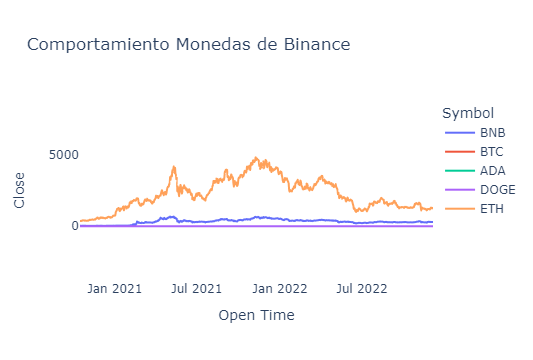

In [161]:
import plotly.express as px

fig1=px.line(data_frame=data,x='Open Time',y='Close',
             color = 'Symbol',
             title='Comportamiento Monedas de Binance',
             labels={
                     "Fecha": "Fecha_dias",
                     "value": "Precio (USD)"
                 })

fig1.update_layout(paper_bgcolor="#FFFFFF",plot_bgcolor='#FFFFFF')

fig1.show()


# Calculamos Perdidas 

En este proceso de nuestro de nuestra script vamos a calcular las diferencias entre un dias para conocer como se compartan las diferencias de tiempo en la historia de las monedas seleccionadas. Agregaremos una columna con resultado boleanos para saber si existe diferencias ademas de la columna con el precio de la diferencia.

In [22]:
steps = 2

def my_fun(x):
    return x.iloc[(-1)] - x.iloc[0]

data['Diferencias'] = data['Close'].rolling(window=steps).apply(my_fun)


In [23]:
data['Diferencias'] = data['Diferencias'].fillna(0)

In [24]:
conditionlist = [
    (data['Diferencias'] >= 0) ,
    (data['Diferencias'] < 0)]
choicelist = [0, 1]
data['diff'] = np.select(conditionlist, choicelist, default='Not Specified')

In [25]:
data.head()

,Open Time,Close Time,Open,High,Low,Close,Volume,Symbol,Diferencias,diff
0,2018-01-01,2018-01-01 23:59:59,8.5478,8.7000,7.8000,8.4500,654338.84,BNB,0.0000,0
1,2018-01-02,2018-01-02 23:59:59,8.4500,9.1133,8.0922,8.7150,1262633.42,BNB,0.2650,0
2,2018-01-03,2018-01-03 23:59:59,8.7151,9.4697,8.2653,9.3040,947392.65,BNB,0.5890,0
3,2018-01-04,2018-01-04 23:59:59,9.3040,9.6511,8.5595,9.1430,964494.94,BNB,-0.1610,1
4,2018-01-05,2018-01-05 23:59:59,9.1350,16.8172,8.9651,14.8908,2764977.04,BNB,5.7478,0


## Diferencias

Creamos un segundo dataframe donde guardaremos todos los valores que tiene una direncia menor a 0, de esta forma graficaremos los puntos rojos en el nuestra siguiente visualización.

In [26]:
diff = data.copy()

In [27]:
index_bool= diff.Diferencias < 0

In [28]:
diff = diff.loc[index_bool, :]
diff.head()

,Open Time,Close Time,Open,High,Low,Close,Volume,Symbol,Diferencias,diff
3,2018-01-04,2018-01-04 23:59:59,9.3040,9.6511,8.5595,9.1430,964494.94,BNB,-0.1610,1
6,2018-01-07,2018-01-07 23:59:59,22.6000,22.6599,18.0500,18.5940,1543764.49,BNB,-4.0060,1
7,2018-01-08,2018-01-08 23:59:59,18.5375,19.2999,14.0018,17.9971,2112065.22,BNB,-0.5969,1
8,2018-01-09,2018-01-09 23:59:59,18.0400,20.6114,16.4350,17.3990,1309277.95,BNB,-0.5981,1
12,2018-01-13,2018-01-13 23:59:59,22.1999,23.4998,21.0400,22.0246,1080455.71,BNB,-0.1753,1


# Segmentando los datos

Ya que hemos generado nuestros dataframes con los que trabajaremos más adelante vamos a segmentar cada moneda utilizando como filtro la columna _Symbolo_ de nuestros datos, de esta forma crearemos vistas para cada Moneda, de forma que ahora podemos trabajar por separado la información.  

Datos de la modena **Cardano**

In [29]:
ADA = data[data['Symbol'] == 'ADA']
ADA_ = diff[diff['Symbol'] == 'ADA']

Datos de la modena **Biance**

In [118]:
BNB = data[data['Symbol'] == 'BNB']
BNB_ = diff[diff['Symbol'] == 'BNB']

Datos de la modena **Bitcoin**

In [31]:
BTC = data[data['Symbol'] == 'BTC']
BTC_ = diff[diff['Symbol'] == 'BTC']

Datos de la modena **Doge**

In [32]:
DOGE = data[data['Symbol'] == 'DOGE']
DOGE_ = diff[diff['Symbol'] == 'DOGE']

Datos de la modena **Ethereum**

In [33]:
ETH = data[data['Symbol'] == 'ETH']
ETH_ = diff[diff['Symbol'] == 'ETH']

# Graficamos la monedas

Creamos graficos para todas las monedas para identifcar su crecimiento en la historia de estos 5 años, para esto hemos utilizados las librerias de Matplotlib para mostrar una grafico lineal donde se adjuntan los valores de perdida con un scatterplot donde hemos graficados los puentos rojos que hemos obtenido de separar la daa donde la diferencia hera mayor a cero, por otro lado es bueno poder mostrar el poder de python y su capacidad de poder mostrar visualziaciones aptas para cada disciplina, por lo que con la libreria mplfinance hemos obtenido un grafico de velas comun para representar este tipo de activos financeros, mostrando unicamente los ultimos 100 dias para cada cryptoactivo. 

## Binance 

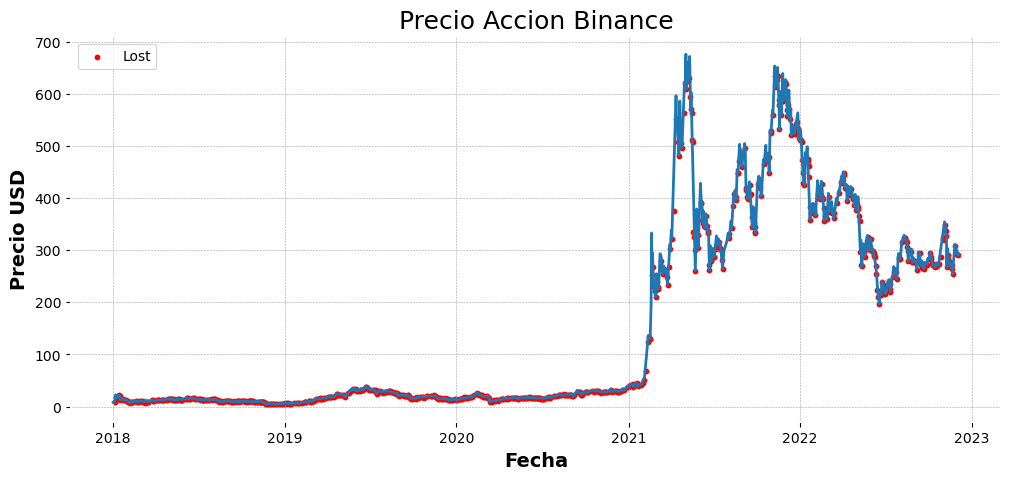

In [61]:
 import matplotlib.pyplot as plt

fig,ax= plt.subplots(figsize=(12,5))
ax.plot(BNB['Open Time'],BNB.Close)
ax.scatter(x=BNB_['Open Time'], y= BNB_.Close, s=10, color='red', label='Lost')
ax.set_xlabel('Fecha', fontsize=14)
ax.set_ylabel('Precio USD', fontsize=14)
ax.set_title('Precio Accion Binance', fontsize=18)
ax.legend(loc='upper left')

#Guardar figura matplotlib
#fig.savefig('Binance.png')

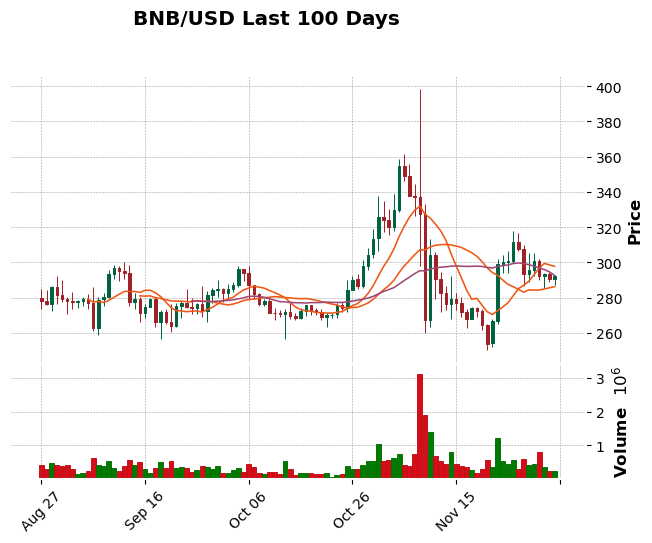

In [60]:
import mplfinance as mpf

mpf.plot(BNB.set_index('Close Time').tail(100), 
        type='candle', style='charles', 
        volume=True, 
        title='BNB/USD Last 100 Days', 
        mav=(10,20,30))

C:\Users\oswal\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


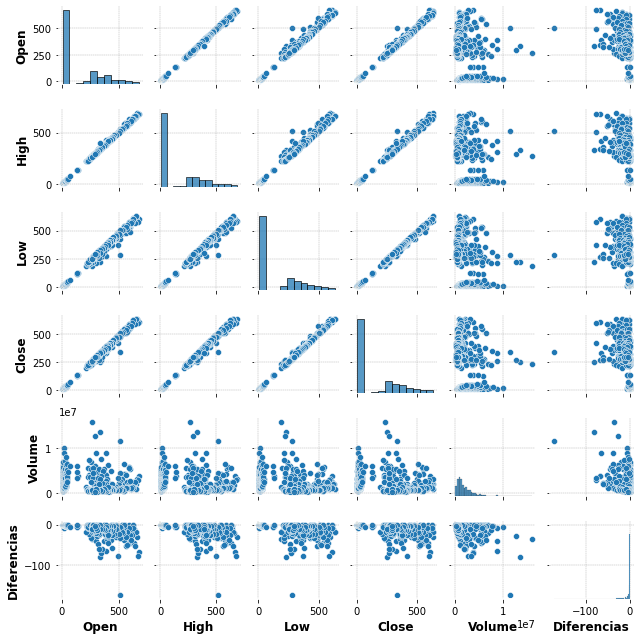

In [79]:
import seaborn as sns
%matplotlib inline

# Calculate and show pairplot
sns.pairplot(BNB_, size=1.5)
plt.tight_layout()

## DOGE

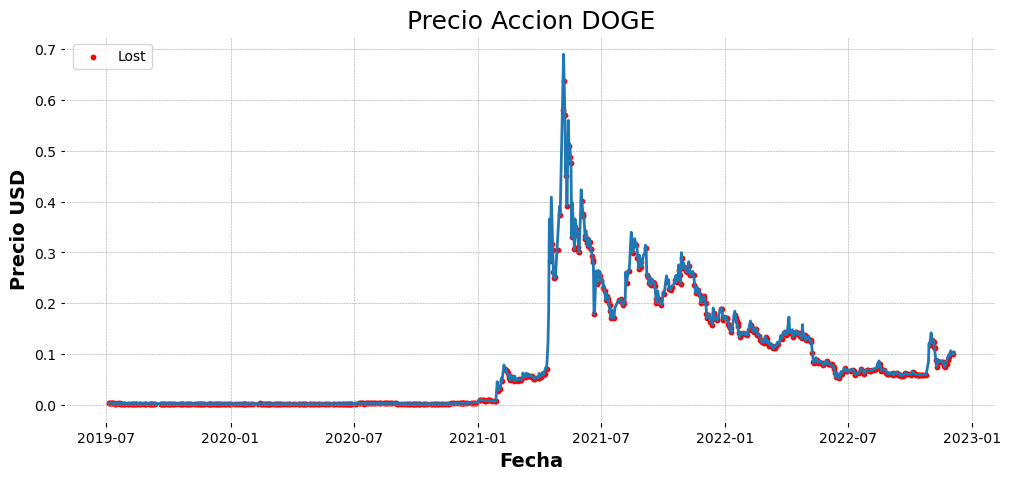

In [62]:
fig,ax= plt.subplots(figsize=(12, 5))
ax.plot(DOGE['Open Time'],DOGE.Close)
ax.scatter(x=DOGE_['Open Time'], y= DOGE_.Close, s=10, color='red', label='Lost')
ax.set_xlabel('Fecha', fontsize=14)
ax.set_ylabel('Precio USD', fontsize=14)
ax.set_title('Precio Accion DOGE', fontsize=18)
ax.legend(loc='upper left')

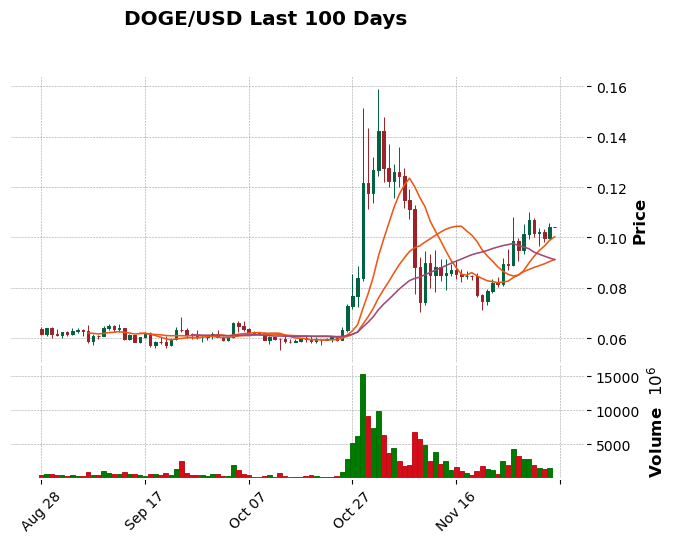

In [48]:
mpf.plot(DOGE.set_index('Close Time').tail(100), 
        type='candle', style='charles', 
        volume=True, 
        title='DOGE/USD Last 100 Days', 
        mav=(10,20,30))

## Bitcoin

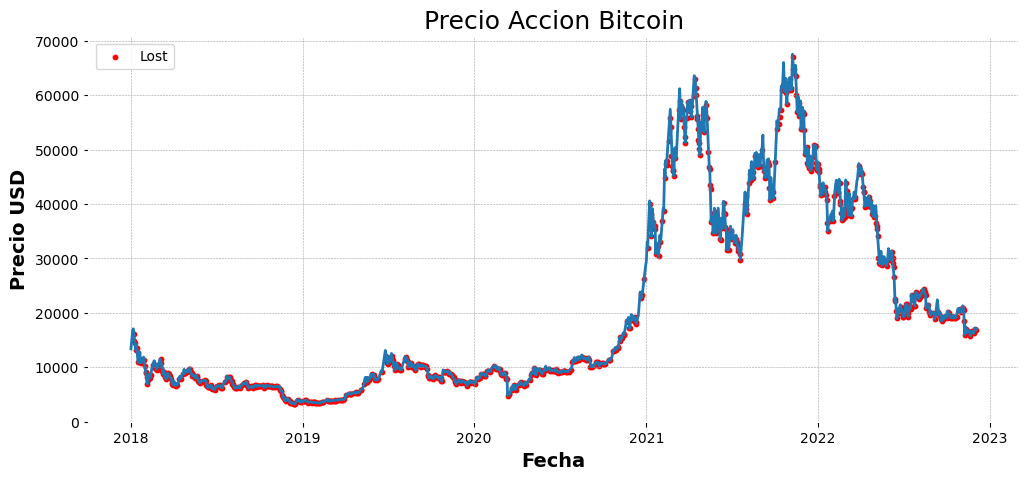

In [63]:
fig,ax= plt.subplots(figsize=(12,5))
ax.plot(BTC['Open Time'],BTC.Close)
ax.scatter(x=BTC_['Open Time'], y= BTC_.Close, s=10, color='red', label='Lost')
ax.set_xlabel('Fecha', fontsize=14)
ax.set_ylabel('Precio USD', fontsize=14)
ax.set_title('Precio Accion Bitcoin', fontsize=18)
ax.legend(loc='upper left')

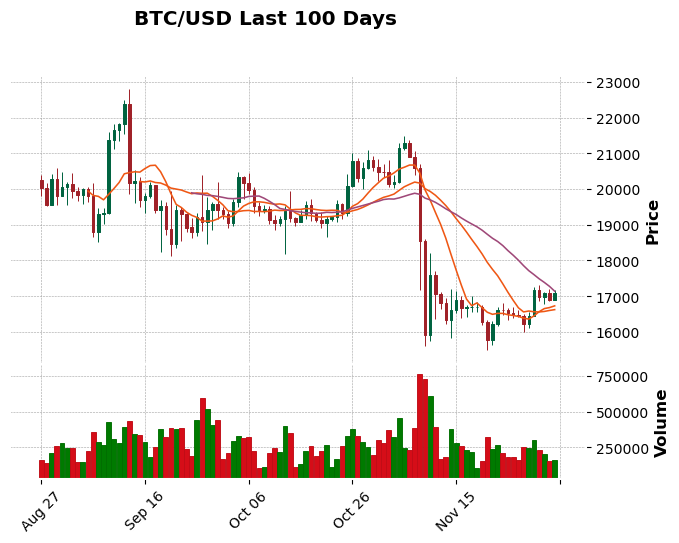

In [51]:
mpf.plot(BTC.set_index('Close Time').tail(100), 
        type='candle', style='charles', 
        volume=True, 
        title='BTC/USD Last 100 Days', 
        mav=(10,20,30))

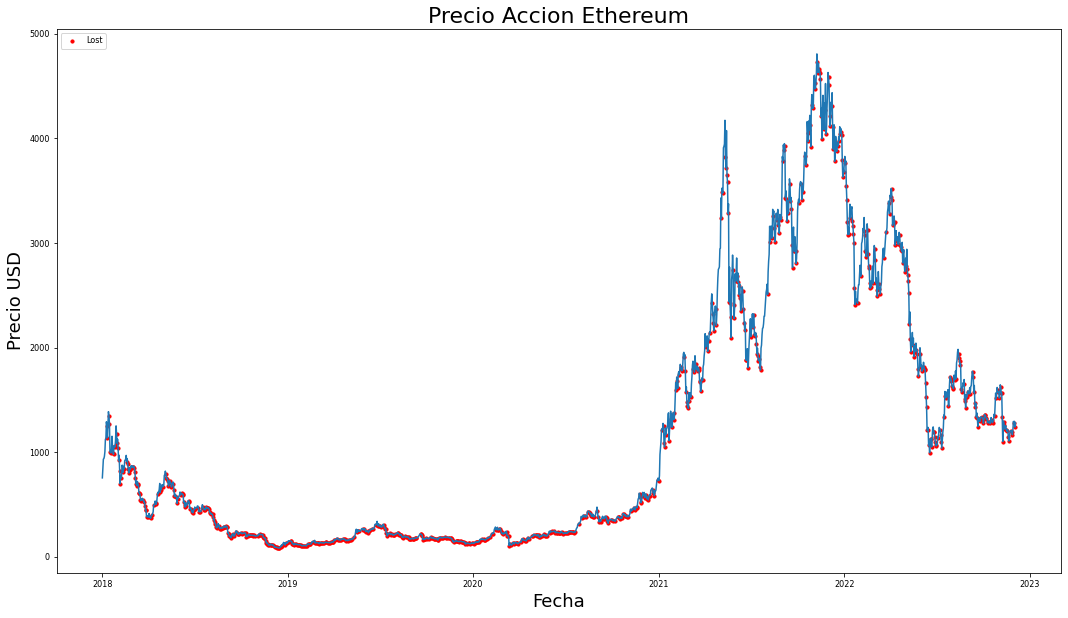

In [277]:
fig,ax= plt.subplots(figsize=(18,10))
ax.plot(ETH['Open Time'],ETH.Close)
ax.scatter(x=ETH_['Open Time'], y= ETH_.Close, s=10, color='red', label='Lost')
ax.set_xlabel('Fecha', fontsize=18)
ax.set_ylabel('Precio USD', fontsize=18)
ax.set_title('Precio Accion Ethereum', fontsize=22)
ax.legend(loc='upper left')


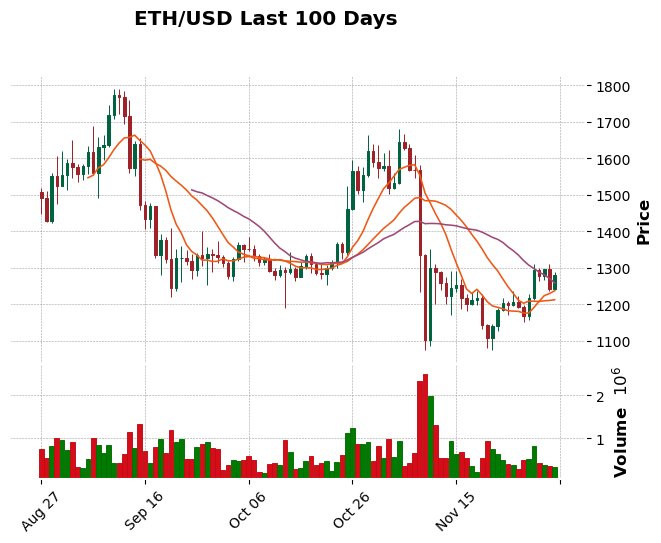

In [65]:
mpf.plot(ETH.set_index('Close Time').tail(100), 
        type='candle', style='charles', 
        volume=True, 
        title='ETH/USD Last 100 Days', 
        mav=(10,20,30))

## Cardano

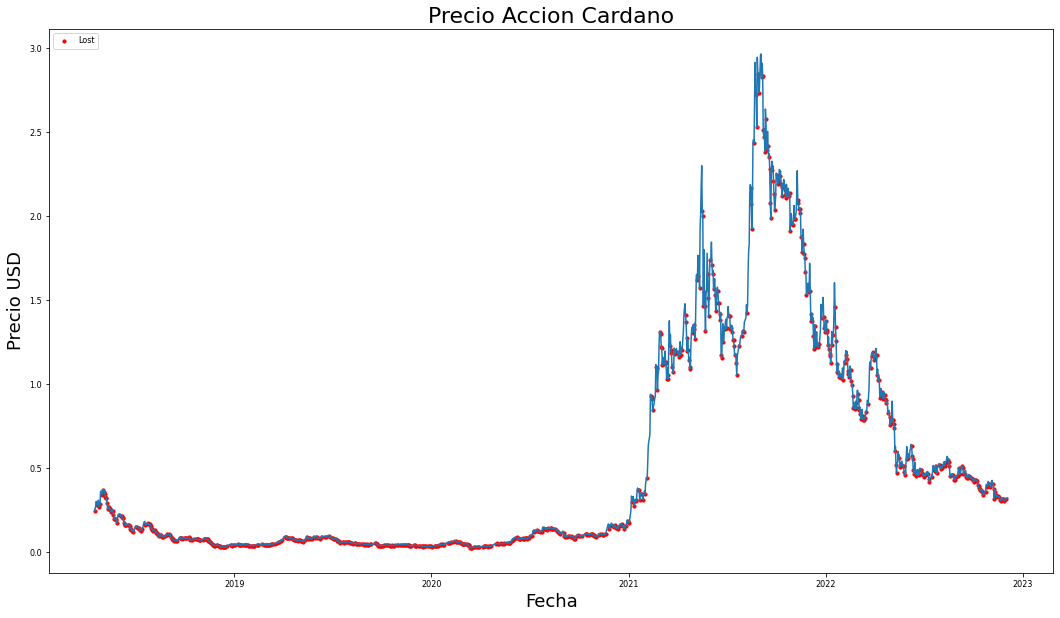

In [280]:
fig,ax= plt.subplots(figsize=(18,10))
ax.plot(ADA['Open Time'],ADA.Close)
ax.scatter(x=ADA_['Open Time'], y= ADA_.Close, s=10, color='red', label='Lost')
ax.set_xlabel('Fecha', fontsize=18)
ax.set_ylabel('Precio USD', fontsize=18)
ax.set_title('Precio Accion Cardano', fontsize=22)
ax.legend(loc='upper left')

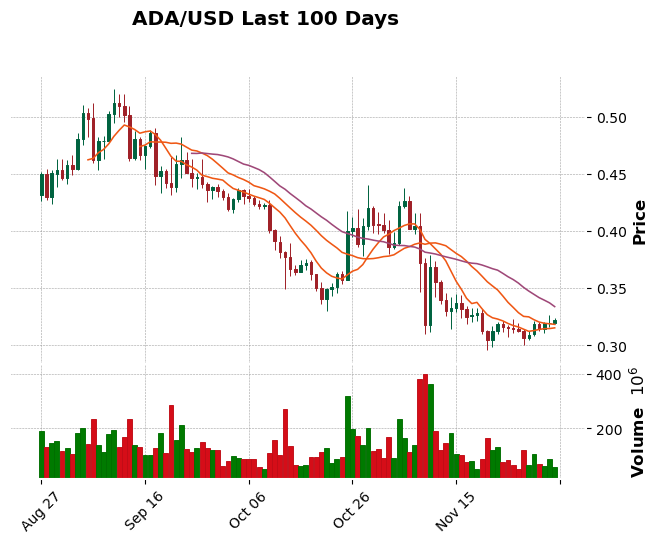

In [53]:
mpf.plot(ADA.set_index('Close Time').tail(100), 
        type='candle', style='charles', 
        volume=True, 
        title='ADA/USD Last 100 Days', 
        mav=(10,20,30))

# Modelo de Simulación I

## Baseline Simulación - Teoría del paseo aleatorio (Random Walk)


La teoría del paseo aleatorio o random walk es un modelo financiero que asume que el mercado de valores se mueve de una manera completamente impredecible. La hipótesis sugiere que el precio futuro de cada acción es independiente de su propio movimiento histórico y del precio de otros valores.

A la hora de generar un modelo predictivo es conveniente identificar un modelo base, o baseline, sobre el que ir comparando cada una de las iteraciones o modelos propuestos. En el caso de las finanzas, acorde a la teoría del paseo aleatorio o Random Walk, los precios de mercado se comportan de manera aleatoria y no dependiente de su serie temporal. De esta manera, la mejor estimación para el valor  tn+1  es el valor  tn  más un cambio impredecible.


En las siguientes lineas se realiza el proceso de transoformación de nuestros datos, esto para que pueda ser utilizado en el modelo de **Random Walk**

In [119]:
#Modificamos el nombre de la primera columna
BNB.columns = ['date', 'Close Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Symbol', 'Diferencias', 'diff']

In [120]:
# Preparación de los datos
BNB['date'] = pd.to_datetime(BNB['date'], format='%Y-%m-%d %H:%M:%S')
BNB = BNB.loc[:, ['date', 'Open', 'Close', 'High', 'Low']]
BNB = BNB.rename({'Open': 'open', 'Close': 'close', 'High': 'high', 'Low': 'low'}, 
                    axis=1)
BNB = BNB.set_index('date')
BNB = BNB.asfreq('D')
BNB = BNB.sort_index()

<ipython-input-120-dd2e03d5b25c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BNB['date'] = pd.to_datetime(BNB['date'], format='%Y-%m-%d %H:%M:%S')


In [121]:
BNB.head()

,open,close,high,low
date,,,,
2018-01-01,8.5478,8.4500,8.7000,7.8000
2018-01-02,8.4500,8.7150,9.1133,8.0922
2018-01-03,8.7151,9.3040,9.4697,8.2653
2018-01-04,9.3040,9.1430,9.6511,8.5595
2018-01-05,9.1350,14.8908,16.8172,8.9651


## Trainin, Test

Separamos nuestro set en Train y Test utilizando las fechas como saparador de nuestras variables.

In [122]:
# Selección de fechas train-test

inicio_train = '2020-01-01 00:00:00'
fin_train = '2021-06-30 23:59:59'

print(f"Serie temporal completa : {BNB.index.min()} --- {BNB.index.max()}  (n={len(BNB)})")
print(f"Fechas train            : {BNB.loc[inicio_train:fin_train].index.min()} --- {BNB.loc[inicio_train:fin_train].index.max()}  (n={len(BNB.loc[inicio_train:fin_train])})")
print(f"Fechas test             : {BNB.loc[fin_train:].index.min()} --- {BNB.loc[fin_train:].index.max()}  (n={len(BNB.loc[fin_train:])})")

Serie temporal completa : 2018-01-01 00:00:00 --- 2022-12-04 00:00:00  (n=1799)
Fechas train            : 2020-01-01 00:00:00 --- 2021-06-30 00:00:00  (n=547)
Fechas test             : 2021-07-01 00:00:00 --- 2022-12-04 00:00:00  (n=522)


## Ejecutamos la predicción

Para este proceso corremos la prediccion de nuestra variable de cierre, una vez calculado este valor utilizamos una metrica de validacion de nuestro modelo para identificar su nivel de precisión.

In [124]:
from sklearn.metrics import mean_absolute_error

# Simulación Random Walk

df_rw = BNB[['close']].copy()
df_rw['pred_close'] = df_rw['close'].shift(1)

# Error de test
y_true = df_rw.loc[fin_train:, 'close']
y_pred = df_rw.loc[fin_train:, 'pred_close']
metrica = mean_absolute_error(y_true, y_pred)

print(f'Error de test: {metrica}')
display(df_rw.loc[fin_train:,].head(4))

Error de test: 10.90588122605364


,close,pred_close
date,,
2021-07-01,287.43,303.71
2021-07-02,287.17,287.43
2021-07-03,298.13,287.17
2021-07-04,307.62,298.13


## Graficamos el Modelo

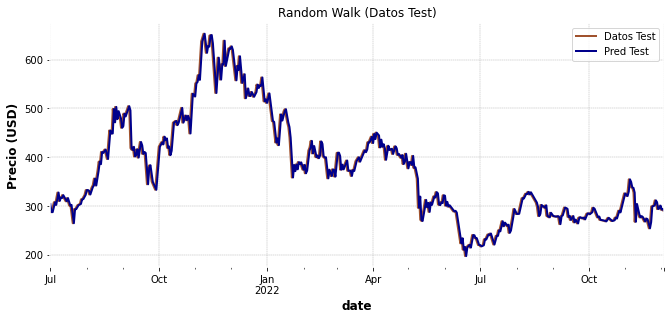

In [125]:
fig, ax = plt.subplots(figsize=(11, 4.5))
df_rw.loc[fin_train:, 'close'].plot(ax=ax, linewidth=2, label='Datos Test',
                                    c='sienna')
df_rw.loc[fin_train:, 'pred_close'].plot(ax=ax, linewidth=2, label='Pred Test',
                                    c='darkblue')
ax.set_title('Random Walk (Datos Test)')
ax.set_ylabel('Precio (USD)')
ax.legend();

## Error test model

In [126]:
df_errores = pd.DataFrame({'modelo': 'Base - Random Walk', 'lags': 1, 
                           'error_test': metrica, 'variables_exog': False},
                          index=[0])
df_errores

,modelo,lags,error_test,variables_exog
0,Base - Random Walk,1,10.905881,False


# Modelo de Simulación II

## Forecaster Autorregresivo

Los modelos autorregresivos, como bien dice su nombre, son modelos que se regresan en sí mismos. Es decir, la variable dependiente y la variable explicativa son la misma con la diferencia que la variable dependiente estará en un momento del tiempo posterior (t) al de la variable independiente (t-1). Decimos ordenados cronológicamente porque actualmente nos encontramos en el momento (t) del tiempo. Si avanzamos un período nos trasladamos a (t+1) y si retrocedemos un período nos vamos a (t-1).

Dado que, para predecir el momento  tn  se necesita el valor de  tn−1 , y  tn−1  se desconoce, se sigue un proceso recursivo en el que, cada nueva predicción, hace uso de la predicción anterior. A este proceso se le conoce como recursive forecasting o recursive multi-step forecasting y pueden generarse fácilmente con las clases ForecasterAutoreg y ForecasterAutoregCustom de la librería __skforecast__.

In [127]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from lightgbm import LGBMRegressor

# Backtest forecasters con diferentes lags
lags = [1, 7, 30]
metricas = []
predicciones_list = []

for lag in lags:
    
    # Crear forecaster
    forecaster = ForecasterAutoreg(
                     regressor     = LGBMRegressor(random_state=123),
                     lags          = lag,
                     transformer_y = None
                 )
    
    # Backtest test data 1 step
    metrica, predicciones = backtesting_forecaster(
                                forecaster         = forecaster,
                                y                  = BNB.loc[inicio_train:, 'close'],
                                initial_train_size = len(BNB.loc[inicio_train:fin_train, 'close']),
                                fixed_train_size   = True,
                                steps              = 1,
                                refit              = True,
                                metric             = 'mean_absolute_error',
                                verbose            = False
                            )
    
    metricas.append(metrica)
    predicciones_list.append(predicciones)

C:\Users\oswal\anaconda3\lib\site-packages\skforecast\model_selection\model_selection.py:369: RuntimeWarning: The forecaster will be fit 522 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 

  warnings.warn(
C:\Users\oswal\anaconda3\lib\site-packages\skforecast\model_selection\model_selection.py:369: RuntimeWarning: The forecaster will be fit 522 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 

  warnings.warn(
C:\Users\oswal\anaconda3\lib\site-packages\skforecast\model_selection\model_selection.py:369: RuntimeWarning: The forecaster will be fit 522 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 

  warnings.warn(


## Graficamos el Modelo

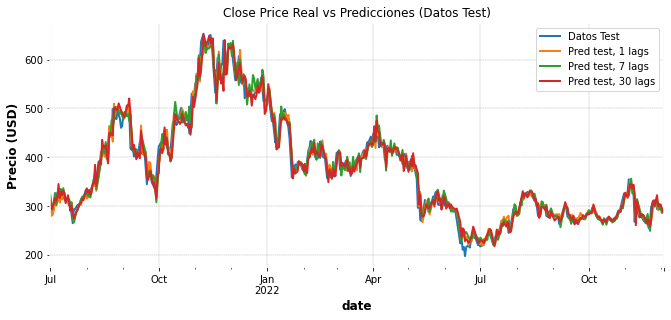

In [129]:
# Gráfico

fig, ax = plt.subplots(figsize=(11, 4.5))
BNB.loc[fin_train:, 'close'].plot(ax=ax, linewidth=2, label='Datos Test')

# Plot predicciones test para diferentes lags
for predicciones, lag in zip(predicciones_list, lags):
    predicciones = predicciones.rename(columns={'pred': f'Pred test, {lag} lags'})
    predicciones.plot(ax=ax, linewidth=2)

ax.set_title('Close Price Real vs Predicciones (Datos Test)')
ax.set_ylabel('Precio (USD)')
ax.legend();

## Error test model

In [130]:
# DataFrame errores de test modelos

modelo = 'LGBMRegressor'

df_errores = pd.concat([
                df_errores,
                pd.DataFrame({'modelo': modelo, 'lags': lags, 
                              'error_test': metricas, 'variables_exog': False})
                ]).reset_index(drop=True)

df_errores.sort_values(by='error_test')

,modelo,lags,error_test,variables_exog
0,Base - Random Walk,1,10.905881,False
1,LGBMRegressor,1,12.814971,False
3,LGBMRegressor,30,13.311752,False
2,LGBMRegressor,7,13.689682,False


# Mostramos las Version de trabajo

In [131]:
!pip install session_info -q 
import session_info
session_info.show(html=False)

-----
binance             1.0.16
keras               2.11.0
lightgbm            3.3.3
matplotlib          3.3.4
mplfinance          0.12.9b7
numpy               1.23.5
pandas              1.5.2
seaborn             0.11.1
session_info        1.0.0
skforecast          0.6.0
sklearn             1.1.3
-----
IPython             7.22.0
jupyter_client      6.1.12
jupyter_core        4.7.1
jupyterlab          3.0.14
notebook            6.3.0
-----
Python 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.22000-SP0
-----
Session information updated at 2022-12-18 01:15


# Conclusiones

En este trabajo deseo trasmitir el poder de Python como herramienta principal en el uso de la Ciencia de Datos. Es comun utilizar un lenguaje de programación sin conocer el verdadero nivel que tiene, y es usual conocer el nivel real al momento de implementar nuevos flujos de trabajo. En el desarrollo de software es comun encontrarnos con nuevos problemas mientras vamos avanzando en el desarrollo de nuestros productos, por lo que tener una comunidad tan grande como la de python nos respaldan al momento de seguir el desarrollo de nuestras aplicaciones.

Uno de los beneficios que tiene usar este lenguaje de programación es el gran crecimiento, python actualmente tiene una de las comunidades mas amplias para resolver problemas van saliendo mientras vamos programando nuestros servicios.

El desarrollo de este trabajo surge con la inciativa de seguir mejorando la implementacion de simulaciones en problemas estocasticos en series de tiempo, el principal objetivo es fortalecer mis bases en el uso de Machine Learning como uso basico en el proceso de Ciencia de Datos, seguir desarrollando el pensamiento analitico para resolver los bugs que puedan presentarce en el proceso de mis desarrollos. 

En general, desarrollar nuestras habilidades en programación como estudiantes de Ciencia de Datos, es de suma importacia para mejorar nuestro pensamiento critico al momento de crear nuevas soluciones, poder poner en practica modelos que nos ayude a simular el comportamientos historicos es un buen paso, y aunque el camino en el desarrollo de Machine Learning es muy largo he implica un desafio de conocimientos adquiridos en toda la licenciatura, fortalecer con experiencias el uso del software es un proceso del conocimiento de mayor importancia, ya que al poner en practica la teoria de las clases nos ayuda a fortalecer mejor la estrucutura de como inicar el proceso de un nuevo proyecto en ciencia de datos.